In [1]:
# Priting over 1 line of code within the same cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# LIBRARIES

# Must
import os
import pandas as pd
import numpy as np
#import datetime as dt

# Visualization
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

# REGEX
#import re

# Math
#import math
#from scipy import stats
#from scipy.stats import shapiro
#import scipy.stats as st

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# Extra
import warnings
warnings.filterwarnings('ignore')
#import pickle

In [3]:
# Print whole df if necessary

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [99]:
# Surfing to the path and concatenating all xsl(s) files

files_path= os.path.abspath('datasets/') 
files = os.listdir(files_path)

files =[os.path.join(files_path, file) for file in files if file != ".DS_Store"]

atp= pd.concat([pd.read_excel(file) for file in files])

In [101]:
# Creating a copy of the original dataset

atp_copy= atp.copy()

### Columns Description:

- |__ATP__| -> Tournament ID. _'int64'_
- |__Location__| -> Location of the tournament. _'object'_
- |__Tournament__| -> Name of the Tournament _'object'_
- |__Date__| -> Date of the tournament. _'datetime'_
- |__Series__| -> Type of tournament. _'object'_
- |__Court__| -> Surface of the match. _'object'_
- |__Round__| -> Round of the competition. _'object'_
- |__Best of__| -> Max amount of sets that can be played in a match. _'float64'_
- |__Winner__| & |__Loser__| -> Winner/Loser of the match. _'object'_
- |__LRank__| & |__Loser__| -> ATP Rank of the winner/loser. _'float64'_
- |__WPts__| & |__LPts__| -> ATP points in Rank of the winner/loser. _'float64'_
- |__W1__| - |__W5__|, |__L1__| - |__W5__| -> Games won or lost by each player on that match. _'float64'_
- |__Comment__| -> Comments on the state of the match. _'object'_  
- |__Wsets__| & |__Lsets__| -> Sets won by the winner/loser. _'float64'_
- |__B365W__| & |__B365W__| -> Bookies odds (Bet 365). _'float64'_
- |__EXW__| & |__EXL__| -> Bookies odds (Express). '_float64'_ _'object'_
- |__SJW__| & |__SJL__| -> Bookies odds (SJ). _'float64'_
- |__PSW__| & |__PSL__| -> Bookies odds (Pinnacle). _'float64'_
- |__MaxW__| & |__MaxL__| -> Max odds offered by any bookie. _'float64'_
- |__MinW__| & |__MinL__| -> Mix odds offered by any bookie. ??
- |__AvgW__| & |__AvgL__| -> Avg odds offered. _'float64'_

In [103]:
atp_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28335 entries, 0 to 2636
Data columns (total 42 columns):
ATP           28335 non-null int64
AvgL          27361 non-null float64
AvgW          27361 non-null float64
B365L         28233 non-null float64
B365W         28210 non-null float64
Best of       28335 non-null int64
Comment       28335 non-null object
Court         28335 non-null object
Date          28335 non-null datetime64[ns]
EXL           23468 non-null float64
EXW           23463 non-null object
L1            28157 non-null float64
L2            27888 non-null float64
L3            13422 non-null float64
L4            2680 non-null float64
L5            1013 non-null float64
LBL           22831 non-null float64
LBW           22820 non-null float64
LPts          28272 non-null float64
LRank         28271 non-null float64
Location      28335 non-null object
Loser         28335 non-null object
Lsets         28151 non-null float64
MaxL          27361 non-null float64
MaxW    

In [104]:
# Standarizing column names

atp_copy.columns= atp_copy.columns.str.lower().str.replace(' ','_')

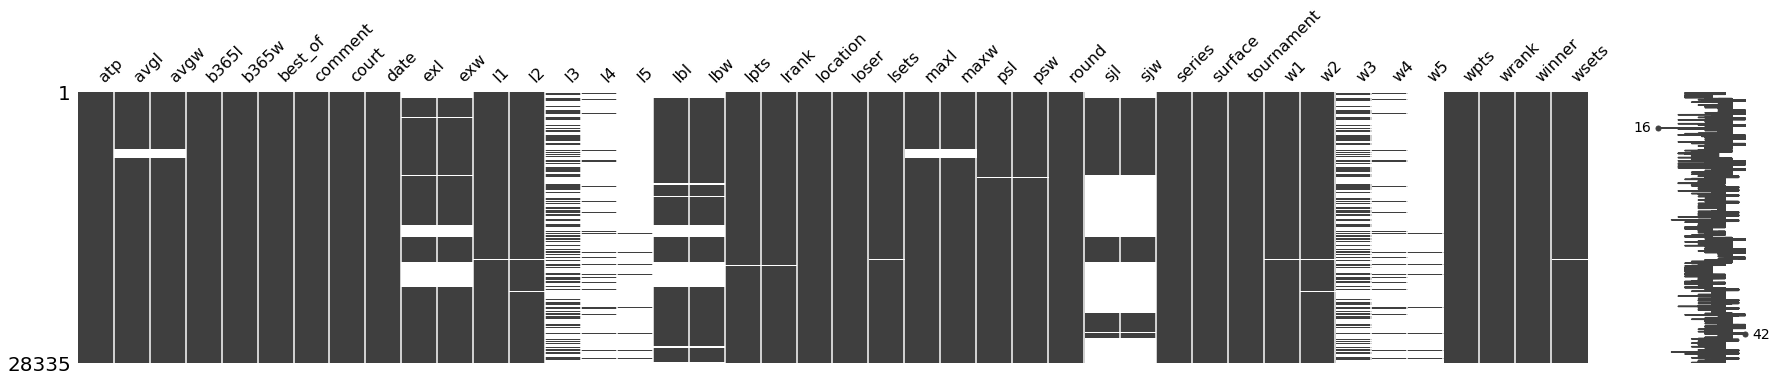

In [105]:
missingno.matrix(atp_copy, figsize = (30,5))

In [106]:
atp_copy.head()
atp_copy.shape

,atp,avgl,avgw,b365l,b365w,best_of,comment,court,date,exl,exw,l1,l2,l3,l4,l5,lbl,lbw,lpts,lrank,location,loser,lsets,maxl,maxw,psl,psw,round,sjl,sjw,series,surface,tournament,w1,w2,w3,w4,w5,wpts,wrank,winner,wsets
0,1,2.42,1.56,2.50,1.50,3,Completed,Indoor,2021-01-07,NaN,NaN,6.0,5.0,1.0,NaN,NaN,NaN,NaN,206.0,267.0,Antalya,Arnaboldi A.,1.0,2.56,1.67,2.44,1.61,1st Round,NaN,NaN,ATP250,Hard,Antalya Open,4.0,7.0,6.0,NaN,NaN,1395.0,40.0,Basilashvili N.,2.0
1,1,1.50,2.57,1.50,2.50,3,Completed,Indoor,2021-01-07,NaN,NaN,6.0,5.0,NaN,NaN,NaN,NaN,NaN,209.0,262.0,Antalya,Zuk K.,0.0,1.55,2.70,1.54,2.63,1st Round,NaN,NaN,ATP250,Hard,Antalya Open,7.0,7.0,NaN,NaN,NaN,150.0,309.0,Celikbilek A.,2.0
2,1,2.53,1.52,2.50,1.50,3,Completed,Indoor,2021-01-07,NaN,NaN,3.0,6.0,NaN,NaN,NaN,NaN,NaN,928.0,67.0,Antalya,Vesely J.,0.0,3.03,1.63,2.58,1.56,1st Round,NaN,NaN,ATP250,Hard,Antalya Open,6.0,7.0,NaN,NaN,NaN,806.0,87.0,Ruusuvuori E.,2.0
3,1,2.11,1.72,2.20,1.61,3,Completed,Indoor,2021-01-07,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,858.0,76.0,Antalya,Caruso S.,0.0,2.30,1.87,2.09,1.81,1st Round,NaN,NaN,ATP250,Hard,Antalya Open,6.0,6.0,NaN,NaN,NaN,1090.0,49.0,Bublik A.,2.0
4,1,2.78,1.44,2.75,1.40,3,Completed,Indoor,2021-01-07,NaN,NaN,6.0,5.0,0.0,NaN,NaN,NaN,NaN,822.0,83.0,Antalya,Herbert P.H.,1.0,3.00,1.50,2.92,1.46,1st Round,NaN,NaN,ATP250,Hard,Antalya Open,3.0,7.0,6.0,NaN,NaN,2555.0,16.0,Goffin D.,2.0


(28335, 42)

In [108]:
# Reseting the index

atp_copy.reset_index(inplace= True)

In [109]:
# Checking for duplicates

atp_copy.duplicated().value_counts()

False    28335
dtype: int64

In [111]:
# Creating a list of indexes under certain condition

index_bestof= atp_copy[atp_copy['best_of']== 5].index

In [112]:
len(atp_copy)
len(index_bestof)

28335

5578

In [113]:
atp_copy.drop(index_bestof, inplace= True)

In [114]:
# Final shape of the dataframe after dropping tournaments that did not go to 4/5 sets

atp_copy.shape

(22757, 43)

In [115]:
atp_copy.columns

Index(['index', 'atp', 'avgl', 'avgw', 'b365l', 'b365w', 'best_of', 'comment',
       'court', 'date', 'exl', 'exw', 'l1', 'l2', 'l3', 'l4', 'l5', 'lbl',
       'lbw', 'lpts', 'lrank', 'location', 'loser', 'lsets', 'maxl', 'maxw',
       'psl', 'psw', 'round', 'sjl', 'sjw', 'series', 'surface', 'tournament',
       'w1', 'w2', 'w3', 'w4', 'w5', 'wpts', 'wrank', 'winner', 'wsets'],
      dtype='object')

In [122]:
atp_copy['exw']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
28330    1.38
28331    1.19
28332     3.2
28333    1.14
28334       6
Name: exw, Length: 22757, dtype: object

In [121]:
def cleaning_EXW(x):
    if x == ',':
        x.replace(',', '')
        return ''
        
atp_copy['exw'].apply(cleaning_EXW)

0        None
1        None
2        None
3        None
4        None
         ... 
28330    None
28331    None
28332    None
28333    None
28334    None
Name: exw, Length: 22757, dtype: object

In [124]:
# Standarazing data

atp_copy['exw'].astype('float64')

ValueError: could not convert string to float: '2.,3'

In [66]:
# Filling na values in the AvgW columns: Avg odds of all bookies

atp_copy['AvgW'].fillna((atp_copy['B365W'] + atp_copy['LBW'] + atp_copy['PSW'] + atp_copy['SJW'])/4, inplace=True)
atp_copy['AvgL'].fillna((atp_copy['B365L'] + atp_copy['LBL'] + atp_copy['PSL'] + atp_copy['SJL'])/4, inplace=True)

KeyError: 'AvgW'

In [16]:
atp_copy.head()

,index,ATP,AvgL,AvgW,B365L,B365W,Best of,Comment,Court,Date,EXL,EXW,L1,L2,L3,L4,L5,LBL,LBW,LPts,LRank,Location,Loser,Lsets,MaxL,MaxW,PSL,PSW,Round,SJL,SJW,Series,Surface,Tournament,W1,W2,W3,W4,W5,WPts,WRank,Winner,Wsets
0,0,1,2.55875,1.49975,2.62,1.44,3,Completed,Outdoor,2010-01-04,2.53,1.48,3.0,6.0,4.0,NaN,NaN,2.375,1.533,568.0,88.0,Brisbane,Nieminen J.,1.0,NaN,NaN,2.740,1.526,1st Round,2.500,1.500,ATP250,Hard,Brisbane International,6.0,4.0,6.0,NaN,NaN,850.0,52.0,Gasquet R.,2.0
1,1,1,1.63125,2.22250,1.57,2.25,3,Completed,Outdoor,2010-01-04,1.65,2.2,4.0,6.0,NaN,NaN,NaN,1.571,2.250,667.0,63.0,Brisbane,Clement A.,0.0,NaN,NaN,1.813,2.140,1st Round,1.571,2.250,ATP250,Hard,Brisbane International,6.0,7.0,NaN,NaN,NaN,521.0,105.0,Odesnik W.,2.0
2,2,1,2.21500,1.64200,2.20,1.61,3,Completed,Outdoor,2010-01-04,2.20,1.65,3.0,1.0,NaN,NaN,NaN,2.100,1.667,587.0,80.0,Brisbane,Petzschner P.,0.0,NaN,NaN,2.360,1.676,1st Round,2.200,1.615,ATP250,Hard,Brisbane International,6.0,6.0,NaN,NaN,NaN,744.0,58.0,Gicquel M.,2.0
3,3,1,1.50525,2.55000,1.44,2.62,3,Completed,Outdoor,2010-01-04,1.46,2.58,4.0,4.0,NaN,NaN,NaN,1.500,2.500,1102.0,32.0,Brisbane,Chardy J.,0.0,NaN,NaN,1.581,2.580,1st Round,1.500,2.500,ATP250,Hard,Brisbane International,6.0,6.0,NaN,NaN,NaN,587.0,81.0,Falla A.,2.0
4,4,1,1.48100,2.69875,1.36,3.00,3,Completed,Outdoor,2010-01-04,1.46,2.6,2.0,0.0,NaN,NaN,NaN,1.444,2.625,649.0,67.0,Brisbane,Llodra M.,0.0,NaN,NaN,1.787,2.170,1st Round,1.333,3.000,ATP250,Hard,Brisbane International,6.0,6.0,NaN,NaN,NaN,461.0,119.0,Levy H.,2.0


In [17]:
# Dropping unnecesary columns for our analysis

atp.columns
drops_cols= ['index','W4', 'W5', 'L4', 'L5','EXW', 'EXL','LBW', 'LBL', 'PSW', 'PSL', 'SJW', 'SJL', 'MaxW', 'MaxL']

Index(['ATP', 'AvgL', 'AvgW', 'B365L', 'B365W', 'Best of', 'Comment', 'Court',
       'Date', 'EXL', 'EXW', 'L1', 'L2', 'L3', 'L4', 'L5', 'LBL', 'LBW',
       'LPts', 'LRank', 'Location', 'Loser', 'Lsets', 'MaxL', 'MaxW', 'PSL',
       'PSW', 'Round', 'SJL', 'SJW', 'Series', 'Surface', 'Tournament', 'W1',
       'W2', 'W3', 'W4', 'W5', 'WPts', 'WRank', 'Winner', 'Wsets'],
      dtype='object')

In [18]:
atp_copy.drop(columns= drops_cols, inplace= True)

In [19]:
# Re-organizing columns

atp_copy= atp_copy[['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'Wsets', 'Lsets', 'Comment',
       'B365W', 'B365L', 'AvgW', 'AvgL']]

In [20]:
atp_copy.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,Wsets,Lsets,Comment,B365W,B365L,AvgW,AvgL
0,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Gasquet R.,Nieminen J.,52.0,88.0,850.0,568.0,6.0,3.0,4.0,6.0,6.0,4.0,2.0,1.0,Completed,1.44,2.62,1.49975,2.55875
1,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Odesnik W.,Clement A.,105.0,63.0,521.0,667.0,6.0,4.0,7.0,6.0,NaN,NaN,2.0,0.0,Completed,2.25,1.57,2.22250,1.63125
2,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Gicquel M.,Petzschner P.,58.0,80.0,744.0,587.0,6.0,3.0,6.0,1.0,NaN,NaN,2.0,0.0,Completed,1.61,2.20,1.64200,2.21500
3,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Falla A.,Chardy J.,81.0,32.0,587.0,1102.0,6.0,4.0,6.0,4.0,NaN,NaN,2.0,0.0,Completed,2.62,1.44,2.55000,1.50525
4,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Levy H.,Llodra M.,119.0,67.0,461.0,649.0,6.0,2.0,6.0,0.0,NaN,NaN,2.0,0.0,Completed,3.00,1.36,2.69875,1.48100


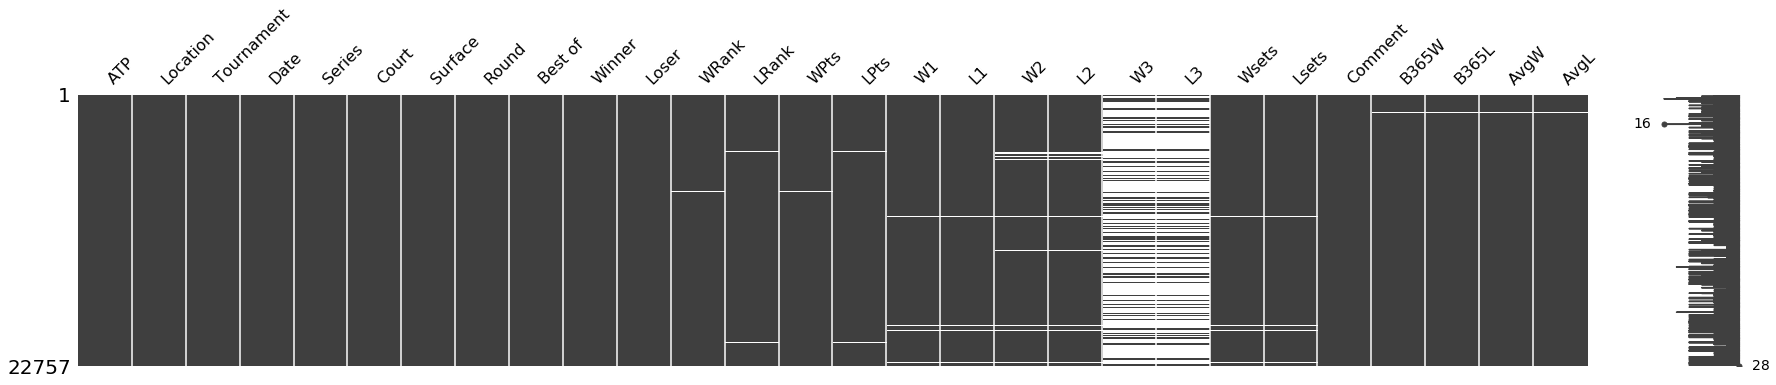

In [21]:
# Visualazing the missing values of the new df

missingno.matrix(atp_copy, figsize = (30,5))

Completed       21945
Retired           656
Walkover          154
Disqualified        1
Awarded             1
Name: Comment, dtype: int64

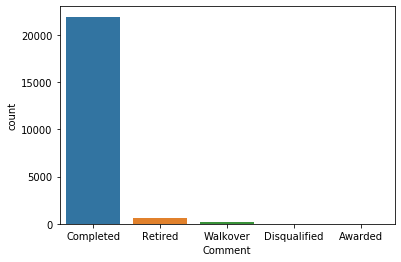

In [22]:
# Dropping all matches that were never completed

atp_copy['Comment'].value_counts()
sns.countplot(data= atp_copy, x= 'Comment')

In [23]:
# Keeping only completed matches

atp_copy= atp_copy[atp_copy.Comment == 'Completed']

In [24]:
atp_copy.shape

(21945, 28)

In [28]:
atp_copy['W3'].dtype

dtype('float64')

In [35]:
# Filling na values of the 3rd set with zeros since the match was finished after 2 sets

atp_copy['W3'].fillna(0, inplace= True)
atp_copy['L3'].fillna(0, inplace= True)

In [36]:
# Creating out target column which is going to be the amount of games / match

atp_copy['total_games'] = atp_copy['W1']+atp_copy['W2']+atp_copy['W3']+atp_copy['L1']+atp_copy['L2']+atp_copy['L3']

In [44]:
atp_copy.head()

,atp,location,tournament,date,series,court,surface,round,best_of,winner,loser,wrank,lrank,wpts,lpts,wsets,lsets,b365w,b365l,avgw,avgl,total_games
0,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Gasquet R.,Nieminen J.,52.0,88.0,850.0,568.0,2.0,1.0,1.44,2.62,1.49975,2.55875,29.0
1,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Odesnik W.,Clement A.,105.0,63.0,521.0,667.0,2.0,0.0,2.25,1.57,2.22250,1.63125,23.0
2,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Gicquel M.,Petzschner P.,58.0,80.0,744.0,587.0,2.0,0.0,1.61,2.20,1.64200,2.21500,16.0
3,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Falla A.,Chardy J.,81.0,32.0,587.0,1102.0,2.0,0.0,2.62,1.44,2.55000,1.50525,20.0
4,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3,Levy H.,Llodra M.,119.0,67.0,461.0,649.0,2.0,0.0,3.00,1.36,2.69875,1.48100,14.0


In [38]:
# We will drop the particular columns for every set since we are only interested in total games in the match

atp_copy.drop(columns= ['W1', 'W2', 'W3', 'L1', 'L2', 'L3'], inplace= True)

In [40]:
# Dropping more unnecessary columns

atp_copy.drop(columns= [['Comment', 'Best of', ], inplace= True)

In [45]:
# Keeping few important columns to run the ML model

red_atp_0 = atp_copy[['series', 'court', 'surface', 'wrank', 'lrank', 'wpts', 'lpts', 'total_games']]

In [58]:
red_atp_0.isnull().sum()
#red_atp_0['total_games'] = red_atp_0['total_games'].fillna(red_atp_0['total_games'].mean())

series          0
court           0
surface         0
wrank          12
lrank          53
wpts           10
lpts           52
total_games     0
dtype: int64

In [59]:
for x in red_atp_0.columns:
    if red_atp_0[x] == NaN:
        return 0

SyntaxError: 'return' outside function (<ipython-input-59-f4902beef4a6>, line 3)

In [46]:
red_atp_0.head()

,series,court,surface,wrank,lrank,wpts,lpts,total_games
0,ATP250,Outdoor,Hard,52.0,88.0,850.0,568.0,29.0
1,ATP250,Outdoor,Hard,105.0,63.0,521.0,667.0,23.0
2,ATP250,Outdoor,Hard,58.0,80.0,744.0,587.0,16.0
3,ATP250,Outdoor,Hard,81.0,32.0,587.0,1102.0,20.0
4,ATP250,Outdoor,Hard,119.0,67.0,461.0,649.0,14.0


In [49]:
categoricals= red_atp_0.select_dtypes('object')
numericals= red_atp_0.select_dtypes('number')

In [50]:
categoricals.head(2)
numericals.head(2)

,series,court,surface
0,ATP250,Outdoor,Hard
1,ATP250,Outdoor,Hard


,wrank,lrank,wpts,lpts,total_games
0,52.0,88.0,850.0,568.0,29.0
1,105.0,63.0,521.0,667.0,23.0


In [53]:
categoricals['series'].unique()
categoricals["court"].unique()

array(['ATP250', 'ATP500', 'Masters 1000', 'Grand Slam', 'Masters Cup'],
      dtype=object)

array(['Outdoor', 'Indoor'], dtype=object)

In [ ]:
# what would be the difference here if i do a one hot encoder vs a map from 0-5

In [52]:
categoricals["series"].map({"ATP250" : 0, "ATP500" : 1, "Masters 1000" : 2, "Grand Slam" : 3, "Master Cup" : 4})
categoricals["court"].map({"ATP250" : 0, "ATP500" : 1, "Masters 1000" : 2, "Grand Slam" : 3, "Master Cup" : 4})

NameError: name 'categoricals_red' is not defined